# <font style="color:black">Annotating Images</font>

In this notebook we will cover how to annotate images using OpenCV. We will learn how to peform the following annotations to images.

* Draw lines
* Draw circles
* Draw rectangles
* Add text

These are useful when you want to annotate your results for presentations or show a demo of your application. Annotations can also be useful during development and debugging.

In [1]:
# Import libraries
import os
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

%matplotlib inline

##  <font style="color:black">Download Assets</font>

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/48hboi1m4crv1tl/opencv_bootcamp_assets_NB3.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB3.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

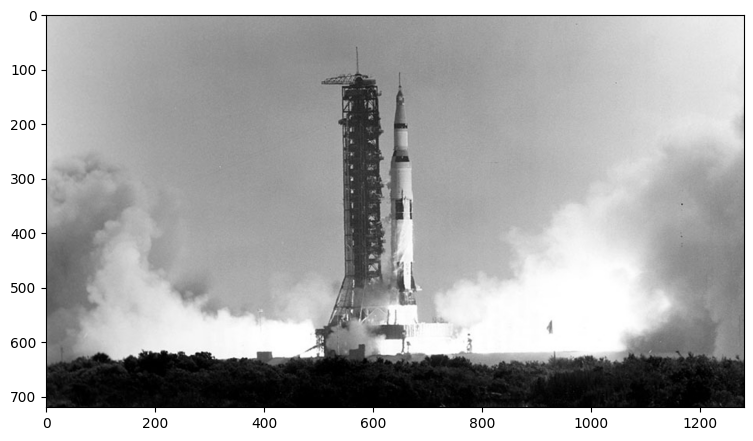

In [4]:
# Read in an image
image = cv2.imread("Apollo_11_Launch.jpg", cv2.IMREAD_COLOR)

# Display the original image
plt.imshow(image[:, :, ::-1])

## <font style="color:black">Drawing a Line</font>


Let's start off by drawing a line on an image. We will use cv2.line function for this.

### <font style="color:rgb(8,133,37)">Function Syntx</font>
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line

2. `pt1`:   First point(x,y location) of the line segment

3. `pt2`:   Second point of the line segment

4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.

2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`line`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2" target="_blank">Documentation link</a>

Let's see an example of this.

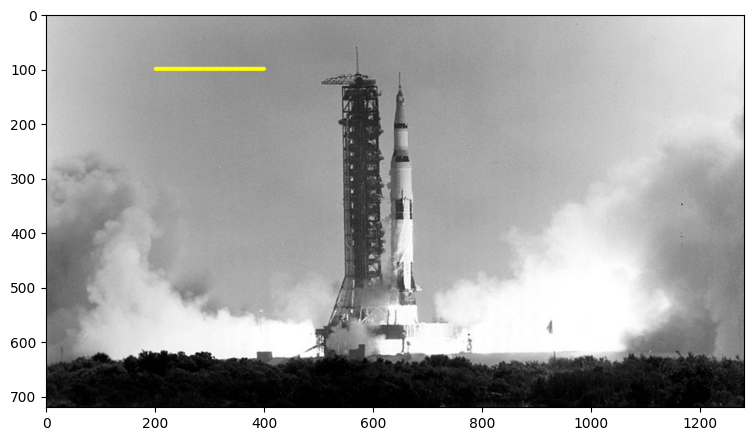

In [5]:
imageLine = image.copy()

# The line starts from (200,100) and ends at (400,100)
# The color of the line is YELLOW (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

cv2.line(imageLine, (200, 100), (400, 100), (0, 255, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageLine[:,:,::-1])

## <font style="color:black">Drawing a Circle</font>


Let's start off by drawing a circle on an image. We will use cv2.circle function for this.

### <font style="color:rgb(8,133,37)">Functional syntx</font>
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line

2. `center`: Center of the circle

3. `radius`: Radius of the circle

4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive).
If a negative value is supplied for this argument, it will result in a filled circle.

2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **cv2.line**
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>
    
**`circle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670" target="_blank">Documentation link</a>

Let's see an example of this.

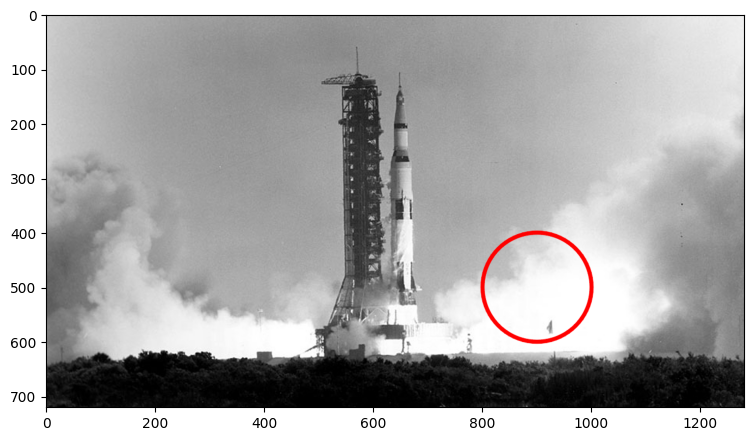

In [6]:
# Draw a circle
imageCircle = image.copy()

cv2.circle(imageCircle, (900,500), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageCircle[:,:,::-1])

## <font style="color:black">Drawing a Rectangle</font>


We will use **cv2.rectangle** function to draw a rectangle on an image. The function syntax is as follows.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.

2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.

3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right** vertex here.

4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the rectangle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

2. `lineType`: Type of the rectangle boundary. This is exact same as lineType argument in
    **cv2.line**
    
### <font style="color:rgb(8,133,37)">OpenCV Documentation Links</font>

**`rectangle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9" target="_blank">Documentation link</a>
   
Let's see an example of this.

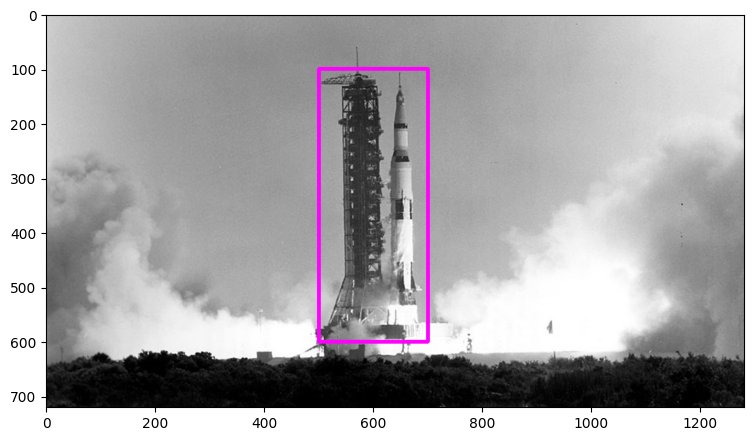

In [7]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()

cv2.rectangle(imageRectangle, (500, 100), (700, 600), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)

# Display the image
plt.imshow(imageRectangle[:, :, ::-1])

## <font style="color:black">Adding Text</font>


Finally, let's see how we can write some text on an image using **cv2.putText** function.

### <font style="color:rgb(8,133,37)">Functional syntx</font>

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.

2. `text`: Text string to be written.

3. `org`: Bottom-left corner of the text string in the image.

4. `fontFace`: Font type

5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.

6. `color`: Font color

Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.

2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`putText`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576" target="_blank">Documentation link</a>
    
Let's see an example of this.

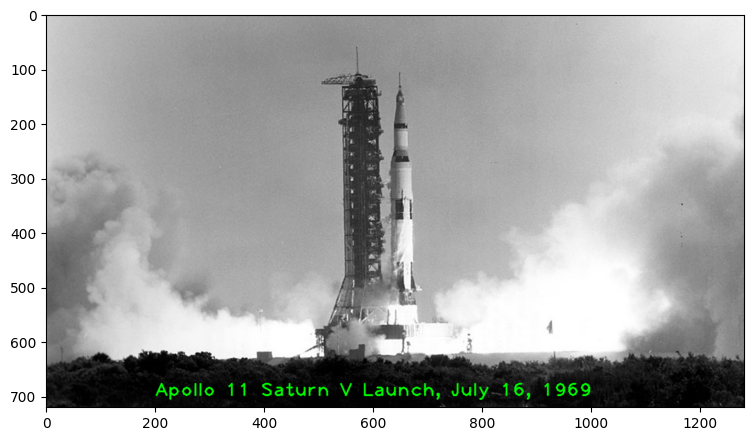

In [8]:
imageText = image.copy()
text = "Apollo 11 Saturn V Launch, July 16, 1969"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (0, 255, 0)
fontThickness = 2

cv2.putText(imageText, text, (200, 700), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:, :, ::-1])

## Thank You!